In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
path = []
import os
for dirname, _, filenames in os.walk('/kaggle/input/lda-data/p_data'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
path

In [2]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist

# for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# for word embedding
import gensim
from gensim.models import Word2Vec
import os
import nltk
import numpy
nltk.download('omw-1.4')
import spacy 
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [3]:
import pandas as pd
import numpy as np
import nltk
from gensim import corpora, models
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("wordnet")

stop_words = stopwords.words("english")
def sw2():
    stop_list2 = set(['facebook','I','app','people','can','will','like','?','want','make','see','get','even','know','just','go','FB','also','re','many','ve','say','we','snap','http','https','cash',
             'one','much','bad','think','year','fb','away','post','now','facebook','need','look','now','well','set','human','without','party','ever','dis','reddit','pin','cashapp',
             'give','way','everything','ask','medium','now','company','thing','try','standard','become','every','new','user','big','put','take','party','good','go','get','discord',
              'take','phone','friend','something','fact','someone','family','stop','since','always','nothing','anything','long','still','talk','tell','old','call','etc','dot',
              'everyone','show','never','let','anyone','able','day','come','really','Facebook','anymore','39','real','amp','twitter','whatsapp','instagram','pinterest','snapchat','we',
             'zuckerberg','wifi','palestine'
                     
                     ])
    non_stop = set(['know','say','bad','think','post','need','like','look','set','well','human','party','good','phone'
                    'friend','fact','family','stop','talk', 'tell','old','call'])
    stop = set(['day', 'month', 'year','time'])
    stop_list2 = list(stop_list2|stop-non_stop)
    return stop_list2
def preprocess_text(text):
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", text)
        words = letters_only.lower().split()
        meaningful_words = [w for w in words if not w in stop_words]
    #     stemmer = nltk.stem.PorterStemmer()
    #     stemmed_words = [stemmer.stem(w) for w in meaningful_words]
        tmp = " ".join([token.lemma_ for token in nlp(' '.join(meaningful_words)) if token.lemma_ not in sw2()])
        return tmp
    except Exception as e:
        print(text)
        return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
arr = []
for i in path:
    df = pd.read_excel(i)
    df['内容'] = df['标题']+". "+df['内容']
    df = df[df['label_p']>0.6][:5000]
    arr.append(df)

In [ ]:
dic = {}
for i,j in zip(arr,path):
    dic[j.split('/')[-1].split('_')[1]] = len(i)
df = pd.DataFrame(dic, index=[0])
df.plot(kind='bar') 
plt.show()

In [ ]:
c = 1
l = []
for i in (dic.values()):
    for i in range(i):
        l.append(c)
    c+=1
df = pd.concat(arr)
df['type'] = l
df[['内容1', '回复']] = df['内容'].str.split('开发者回复', n=1, expand=True)


In [ ]:
df["processed_text"] = df["内容1"].apply(preprocess_text)
filter_func = lambda x: ' '.join([word for word in x.split() if len(word) > 2])

df['processed_text'] = df['processed_text'].apply(filter_func)

In [ ]:
df.to_excel('end_data.xlsx',index=False)

In [4]:
import pandas as pd
df = pd.read_excel('/kaggle/input/lda-data/end_data.xlsx')
df['processed_text'] = df['processed_text'].astype(str)
docs = df['processed_text'].values

In [ ]:
from embedded_topic_model.utils import preprocessing
import json

# Loading a dataset in JSON format. As said, documents must be composed by string sentences

documents = docs

# Preprocessing the dataset
vocabulary, train_dataset, _, = preprocessing.create_etm_datasets(
    documents, 
    min_df=0.01, 
    max_df=0.75, 
    train_size=0.95, 
)
documents = list(docs)
from embedded_topic_model.utils import embedding

# Training word2vec embeddings
embeddings_mapping = embedding.create_word2vec_embedding_from_dataset(documents)

In [ ]:
###### from embedded_topic_model.models.etm import ETM
z = []
# Training an ETM instance
for i in range(2,11):
    etm_instance = ETM(
        vocabulary,
        embeddings=embeddings_mapping, # You can pass here the path to a word2vec file or
                                       # a KeyedVectors instance
        num_topics=i,
        epochs=15,
        debug_mode=False,
        train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                                # topic embeddings. By default, is False. If 'embeddings' argument
                                # is being passed, this argument must not be True
    )

    etm_instance.fit(train_dataset)
    topics = etm_instance.get_topics()
    cm = CoherenceModel(topics=topics ,texts=tokenized
                    , corpus=corpus, dictionary=id2word, coherence='c_v')
    ass = []
    for i in topics:
        ass.extend(i)
    td = len(set(ass))/len(ass)
    print(cm.get_coherence())
    z.append(td)

In [ ]:
for i in z:
    print(i)

In [ ]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel
tokenized = [list(tokenize(s)) for s in docs]
id2word = corpora.Dictionary(tokenized)
corpus = [id2word.doc2bow(text) for text in tokenized]

In [ ]:
cm = CoherenceModel(topics=topics ,texts=tokenized
                , corpus=corpus, dictionary=id2word, coherence='c_v')
ass = []
for i in topics:
    ass.extend(i)
td = len(set(ass))/len(ass)
print(cm.get_coherence(),td)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import models
from bertopic.representation import KeyBERTInspired

In [7]:
cluster_model = KMeans(n_clusters=5)
representation_model = KeyBERTInspired()
topic_model = BERTopic(hdbscan_model=cluster_model,embedding_model="all-MiniLM-L6-v2",representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)
# topic_model.visualize_barchart(top_n_topics=5,n_words=10,height=300)

In [8]:
d = {
0: 'Data Theft',
1: 'Personal Privacy Data',
2: 'Privacy Breach and Login',
3: 'Privacy-related Function Bugs',
4: 'Privacy Security'
}
topic_model.set_topic_labels(d)

In [23]:
fig = topic_model.visualize_barchart(top_n_topics=5,n_words=10,height=300,custom_labels=True,width=300)

In [33]:
fig.write_html('1.html')

In [34]:
fig = topic_model.visualize_documents(docs,custom_labels=False)
fig.write_html('2.html')

Batches:   0%|          | 0/535 [00:00<?, ?it/s]

In [9]:
df['class'] = topic_model.get_document_info(docs)['Topic']

In [ ]:
# df.to_excel('zz.xlsx',index=False)

In [35]:
import wordcloud
import matplotlib.pyplot as plt

In [29]:
data = df


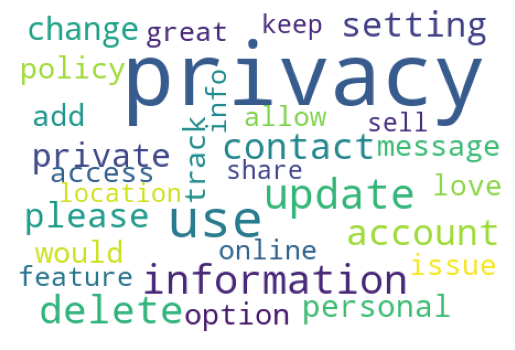

In [43]:
num = 4
data = df[df['class']==num]
start_token = '<START>'
end_token = '<END>'
lemma_list = []
for i in data['processed_text']:
    lemma_list.append(start_token)
    lemma_list.extend(i.split(' '))
    lemma_list.append(end_token)
topic_reviews = nltk.Text(lemma_list)
fdist = FreqDist([i for i in topic_reviews if i!=start_token and i!=end_token])
import wordcloud
import matplotlib.pyplot as plt
w = wordcloud.WordCloud(width=450,height=300,background_color='white',relative_scaling=0.5)
w.fit_words(dict(fdist.most_common(30)))
plt.axis('off')
plt.imshow(w)
# 保存词云图像为文件
plt.savefig('wordcloud{}.png'.format(num), dpi=300, bbox_inches='tight')

In [18]:
topic_reviews.concordance('feature',100)

Displaying 25 of 181 matches:
cker obtain move <END> <START> beautiful love feature friendly interface far beat social platform p
> anti privacy practice nobody surprised hear feature privacy first share contact location use enco
ivacy steep cost free <END> <START> snapscore feature hide snapscore privacy <END> <START> back won
location precise location allow map necessary feature function invasion privacy witch either must a
nvasion privacy witch either must abide enjoy feature shame <END> <START> privacy abuse use locatio
D> <START> forever favorite mine love privacy feature <END> <START> private rid search history loca
e location private happen privacy please lose feature <END> <START> privacy bitmoji ugly bitmoji ba
wnright dirty trust opposite two star instead feature disappear message continue violate permission
 far invasion privacy address direction house feature less significant location relate feel comfort
 could potentially dangerous horrible outcome feature remove immediate

In [48]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,compromise autoimmune progress reach support m...,1,1_hack_hacker_account_password,"[hack, hacker, account, password, login, recov...",[hack account support account hack several reg...,hack - hacker - account - password - login - r...,False
1,privacy update option allow story explanation ...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
2,privacy okay expose screen recording,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
3,piece uncle upcoming update chat easy streamli...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
4,control today picture picnic important back ho...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
...,...,...,...,...,...,...,...
17110,love mean easy manage different page easily us...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
17111,barely upload setting privacy apple assist rem...,4,4_privacy_private_security_secure,"[privacy, private, security, secure, social, i...","[privacy, privacy privacy, privacy privacy]",privacy - private - security - secure - social...,False
17112,review although overall love slowly turn add c...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False
17113,use great non functional love use visual proje...,3,3_feature_privacy_social_change,"[feature, privacy, social, change, tab, tiktok...",[useful fun plenty issue first doubt use diffe...,feature - privacy - social - change - tab - ti...,False


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.representation import KeyBERTInspired
def get_c_v(docs,topics,topic_model):
    documents = pd.DataFrame({"Document": docs,
                              "ID": range(len(docs)),
                              "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)
    # Extract vectorizer and analyzer from BERTopic
    vectorizer = topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()

    tokens = [analyzer(doc) for doc in cleaned_docs]

    dictionary = corpora.Dictionary(tokens)

    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]
    a = []
    for i in range(len(topic_words)):
        b = []
        for word in topic_words[i]:
            if word != '':
                b.append(word)
        a.append(b)

    topic_words = a
    coherence_model = CoherenceModel(topics=topic_words, 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')

    coherence = coherence_model.get_coherence()

    return coherence
def get_values():
    d = []
    for i in range(3,9):
        topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",language="english", calculate_probabilities=False, verbose=False,nr_topics=i+1)
        topics, probs = topic_model.fit_transform(docs)
        tmp = get_c_v(docs,topics,topic_model)
        print(tmp)
        d.append(tmp)
    plt.plot(range(3, 9), d)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.show()
    return d

def get_values1():
    d = []
    for i in range(3,9):
        cluster_model = KMeans(n_clusters=i)
        # Create your representation model
        representation_model = KeyBERTInspired()

        # Use the representation model in BERTopic on top of the default pipeline
        
        topic_model = BERTopic(hdbscan_model=cluster_model,representation_model=representation_model)
        topics, probs = topic_model.fit_transform(docs)
        tmp = get_c_v(docs,topics,topic_model)
        print(tmp)
        d.append(tmp)
    plt.plot(range(3, 9), d)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.show()
    return d


In [ ]:
get_values1()

In [ ]:
get_values()

In [ ]:
dictionary = corpora.Dictionary(df["processed_text"].apply(lambda x: x.split()))

corpus = [dictionary.doc2bow(text.split()) for text in df["processed_text"]]

def compute_coherence_score(num_topics, corpus, dictionary, texts):
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10,random_state=1,iterations=1500,alpha=0.1,eta=0.01)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

In [ ]:
def compute_coherence_score(num_topics, corpus, dictionary, texts):
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10,random_state=1,iterations=1500,alpha=0.1,eta=0.01)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score
coherence_scores = []
for num_topics in range(3, 9):
    coherence_score = compute_coherence_score(num_topics, corpus, dictionary, df["processed_text"].apply(lambda x: x.split()))
    coherence_scores.append(coherence_score)
    print("Num Topics: {}, Coherence Score: {}".format(num_topics, coherence_score))
plt.plot(range(3, 9), coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6,passes=10,random_state=1,iterations=1500,alpha=0.1,eta=0.01)



t = lda_model.show_topics(num_words=20)
t = [i[1] for i in t]
arr = []
for id,s in enumerate(t):
    s =s.split('+')
    s = [i.split('*')[-1] for i in s]
    a = [i.strip().strip('"') for i in s]
    a.insert(0,'TOPIC'+str(id+1))
    arr.append(a)
grid = arr
grid = [[row[i] for row in grid] for i in range(len(grid[0]))]
grid

In [ ]:
t = lda_model.show_topics(num_words=20)
t = [i[1] for i in t]
arr = []
for id,s in enumerate(t):
    s =s.split('+')
    s = [i.split('*')[-1] for i in s]
    a = [i.strip().strip('"') for i in s]
    a.insert(0,'TOPIC'+str(id+1))
    arr.append(a)
grid = arr
grid = [[row[i] for row in grid] for i in range(len(grid[0]))]
grid
rs = pd.DataFrame(grid)

rs.to_excel('my_lda.xlsx', index=False)

In [ ]:
start_token = '<START>'
end_token = '<END>'
lemma_list = []
for i in result[result['class']==0]['processed_text']:
    lemma_list.append(start_token)
    lemma_list.extend(i.split(' '))
    lemma_list.append(end_token)
topic_reviews = nltk.Text(lemma_list)

In [ ]:
fdist = FreqDist([i for i in topic_reviews if i!=start_token and i!=end_token])

In [ ]:
fdist.most_common(20)

In [ ]:
from nltk import FreqDist

FreqDist(topic_class)

In [ ]:
doc_topic = DocumentTopicMatrix
doc_rank = doc_topic[:,2].argsort()[::-1]
a = doc_rank

In [ ]:
start_token = '<START>'
end_token = '<END>'
lemma_list = []
for i in df.iloc[a][:1000]['processed_text']:
    lemma_list.append(start_token)
    lemma_list.extend(i.split(' '))
    lemma_list.append(end_token)
topic_reviews = nltk.Text(lemma_list)

In [ ]:
topic_reviews.concordance('update',70)

In [ ]:
fdist = FreqDist([i for i in topic_reviews if i!=start_token and i!=end_token])

In [ ]:
fdist.most_common(20)